In [1]:
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_datareader
# !pip install yfinance
# !pip install --upgrade pandas-datareader

In [2]:
# !pip install -r requirements.txt

In [3]:
#basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

#tf and keras for nn
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

#sklearn for preprocessing and metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, mean_absolute_error

#fetching data
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [4]:
import warnings
warnings.filterwarnings("ignore") 

## load the data

In [5]:
df = pdr.get_data_yahoo('AAPL', start='2018-01-01', end = dt.datetime.now())

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.776531,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.769421,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.958786,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.425121,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.271263,82271200
...,...,...,...,...,...,...
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000
2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400
2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400


In [6]:
print(f'Number of trading days: {df.shape[0]}')

Number of trading days: 1461


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.776531,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.769421,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.958786,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.425121,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.271263,82271200


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000
2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400
2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400
2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900
2023-10-20,175.309998,175.419998,172.639999,172.880005,172.880005,64189300



**need to convert date into datetime object**

In [9]:
# def convertDateTime(date):
#     date_tuple = date.split('-')
#     year, month, day= int(date_tuple[0]),int( date_tuple[1]),int( date_tuple[2])
    
#     return dt.datetime(year, month,day)

In [10]:
# df['Date'] = df['Date'].apply(convertDateTime)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2018-01-02 to 2023-10-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1461 non-null   float64
 1   High       1461 non-null   float64
 2   Low        1461 non-null   float64
 3   Close      1461 non-null   float64
 4   Adj Close  1461 non-null   float64
 5   Volume     1461 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 79.9 KB


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1.461000e+03
mean,107.813467,109.068457,106.645096,107.907500,106.412080,1.091119e+08
std,49.854739,50.398912,49.336826,49.886724,50.265235,5.505256e+07
min,35.994999,36.430000,35.500000,35.547501,34.163822,3.145820e+07
25%,53.247501,53.610001,52.687500,53.160000,51.148808,7.337410e+07
50%,120.930000,122.760002,119.250000,120.989998,118.949921,9.463960e+07
75%,149.899994,151.490005,148.490005,150.429993,149.302795,1.297724e+08
max,196.240005,198.229996,195.279999,196.449997,196.185074,4.265100e+08


In [13]:
print('Null value counts:')
df.isna().sum()

Null value counts:


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
print(plt.style.available)
sns.set_style('ticks')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


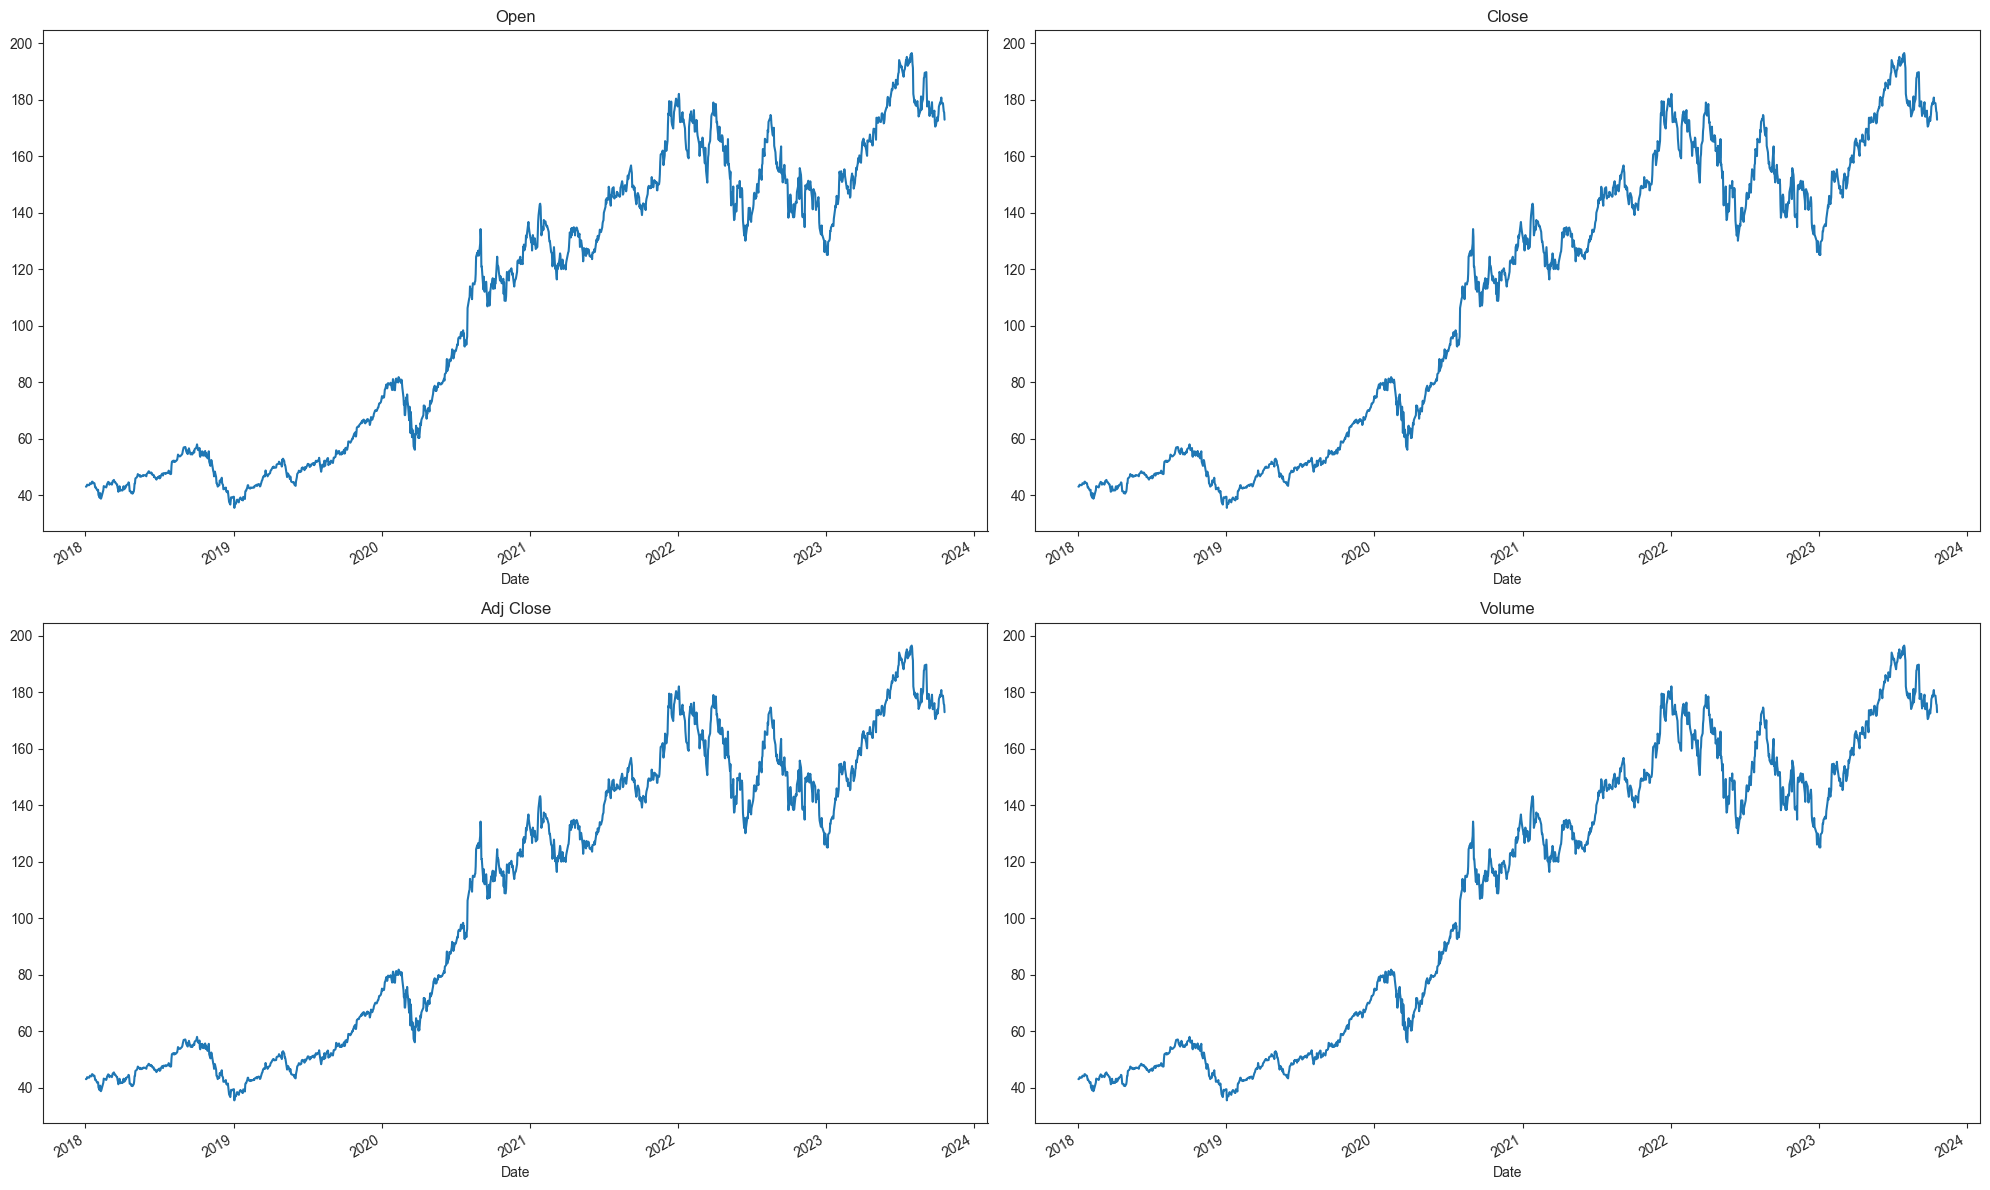

In [16]:
# plot each category date wise
columns = ['Open',	'Close','Adj Close'	, 'Volume']
plt.figure(figsize=(20,12))

for i, col in enumerate(columns):
    plt.subplot(2,2,i+1)
    df['Close'].plot()          
    # sns.lineplot(df,x ='Date',y=col,color = 'firebrick' )
    plt.title(col)
plt.tight_layout()
plt.show()

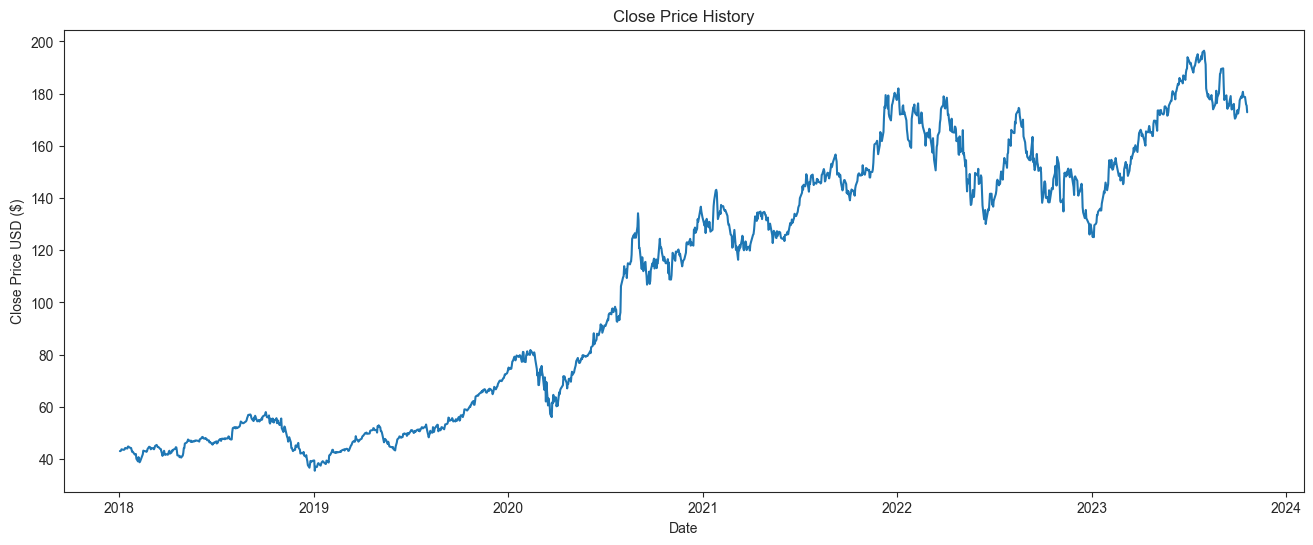

In [17]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [18]:
# get the close column data as np array
data = df.filter(['Close'])
#convert to np array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * 0.95 ))

training_data_len

1388

**Scale the data between 0 to 1**

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04672083],
       [0.04667422],
       [0.04791721],
       ...,
       [0.87191   ],
       [0.86954839],
       [0.85351382]])

In [20]:
train_data = scaled_data[:int(training_data_len), : ] 

#build the dataset for feeding to NN
x_train = []
y_train = []


# here past day 0 to day 59 data will act as x and day 60 data will work as y (target) i.e. we converted this into supervised model

past = 60 

for i in range(past, len(train_data)):
    x_train.append(train_data[i-past:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the datasets into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)


In [21]:
x_train.shape

(1328, 60)

In [22]:
# Reshape the data from 2D to 3D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [23]:
x_train.shape

(1328, 60, 1)

**Model Building**

In [24]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1328/1328 [==============================] - 29s 20ms/step - loss: 0.0017
Epoch 2/2
1328/1328 [==============================] - 26s 20ms/step - loss: 8.4311e-04


In [25]:
# Create the testing data set

test_data = scaled_data[training_data_len - past: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(past, len(test_data)):
    x_test.append(test_data[i-past:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))



### Predictions

In [26]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


3/3 [==============================] - 1s 19ms/step


In [27]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.564843359808075

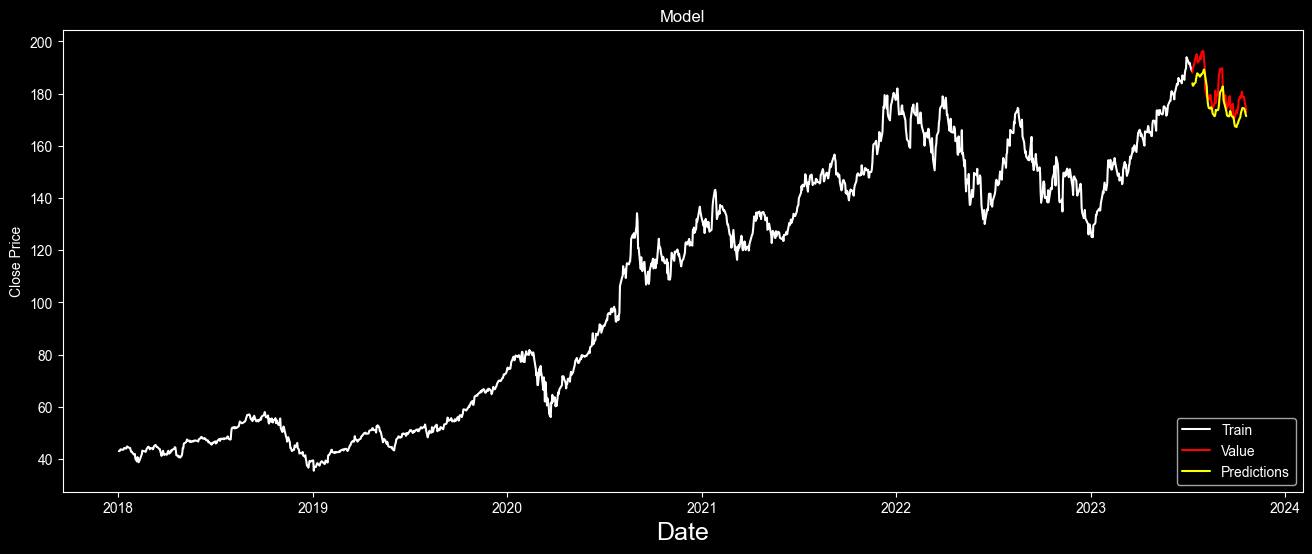

In [28]:
train = data[:training_data_len]
pred = data[training_data_len:]

pred['Predictions'] = predictions

plt.style.use('dark_background')

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price')
plt.plot(train['Close'], color='white')


plt.plot(pred['Close'], color = 'red')
plt.plot(pred['Predictions'], color ='yellow')
plt.legend(['Train', 'Value', 'Predictions'], loc='lower right')
plt.show()

In [29]:
pred

,Close,Predictions
Date,,
2023-07-11,188.080002,183.961853
2023-07-12,189.770004,183.035751
2023-07-13,190.539993,183.115143
2023-07-14,190.690002,183.708694
2023-07-17,193.990005,184.288330
...,...,...
2023-10-16,178.720001,174.337112
2023-10-17,177.149994,173.955093
2023-10-18,175.839996,173.155121
